In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
import klib as k
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,RobustScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn .model_selection import train_test_split,cross_val_score
from sklearn.linear_model import Lasso,Ridge,LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [68]:
df=pd.read_csv("bodyfat.csv")
df

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [69]:
k.clean_column_names(df)

,density,body_fat,age,weight,height,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   density   252 non-null    float64
 1   body_fat  252 non-null    float64
 2   age       252 non-null    int64  
 3   weight    252 non-null    float64
 4   height    252 non-null    float64
 5   neck      252 non-null    float64
 6   chest     252 non-null    float64
 7   abdomen   252 non-null    float64
 8   hip       252 non-null    float64
 9   thigh     252 non-null    float64
 10  knee      252 non-null    float64
 11  ankle     252 non-null    float64
 12  biceps    252 non-null    float64
 13  forearm   252 non-null    float64
 14  wrist     252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [71]:
df

,density,body_fat,age,weight,height,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


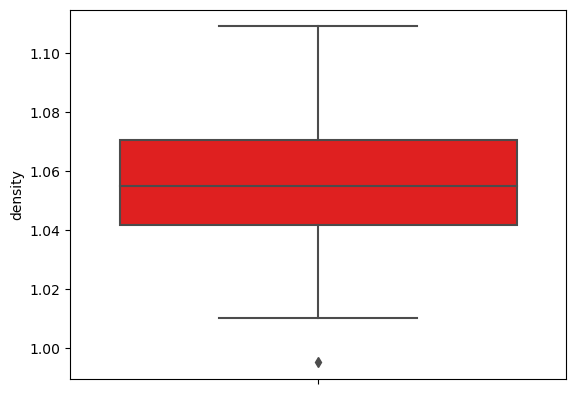

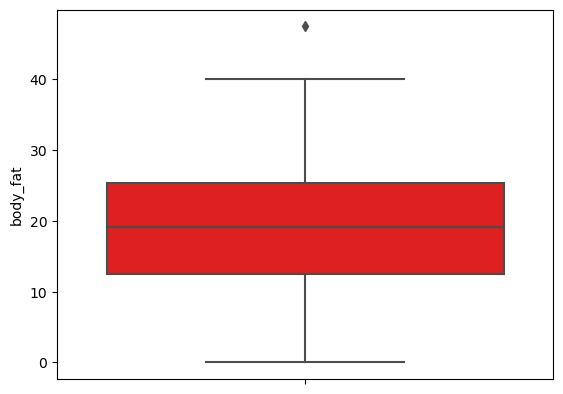

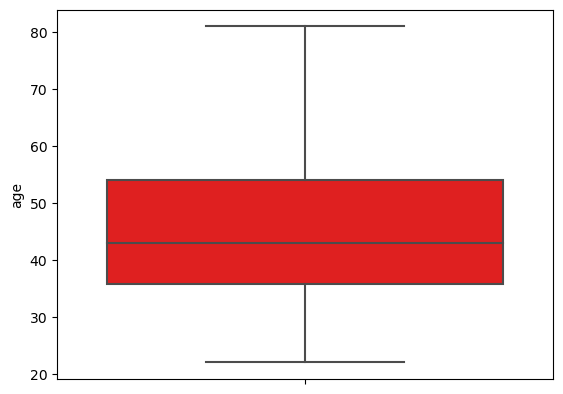

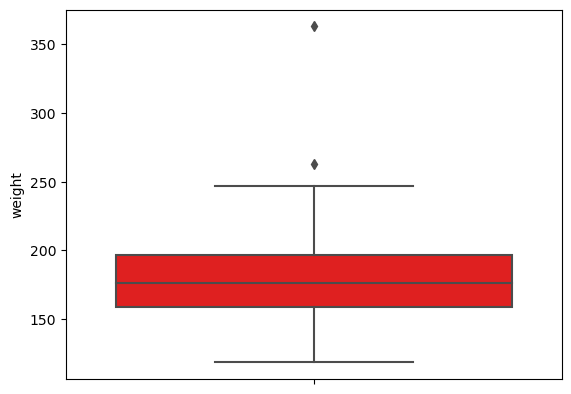

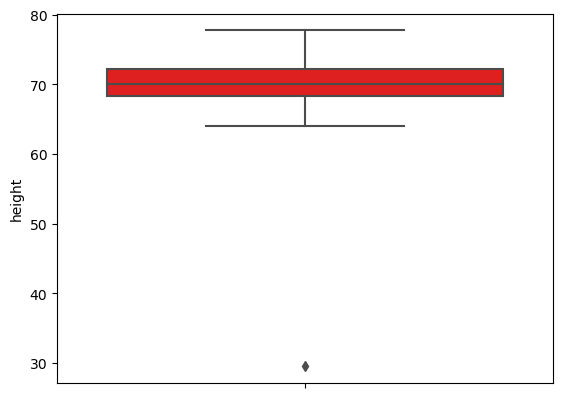

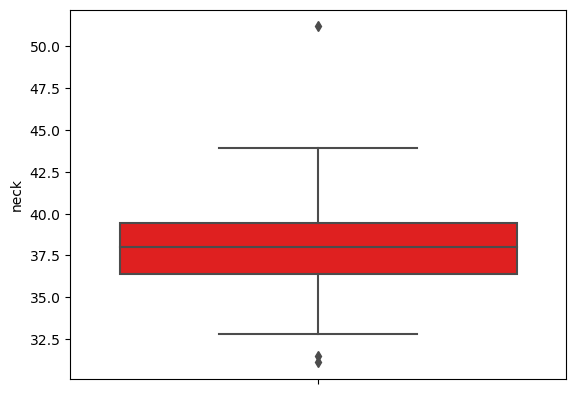

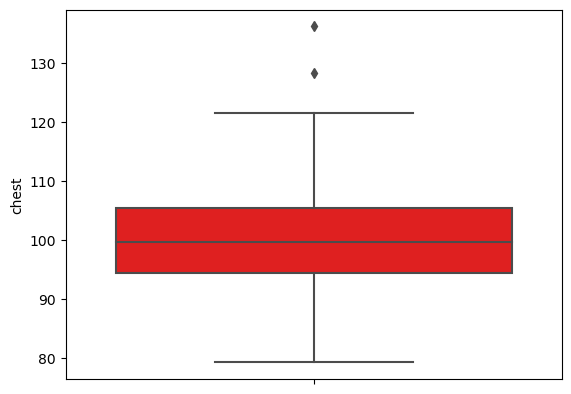

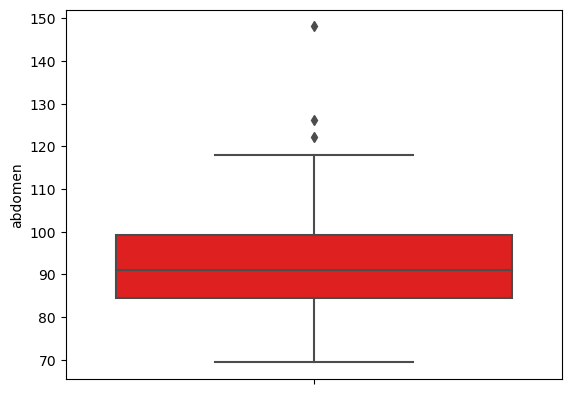

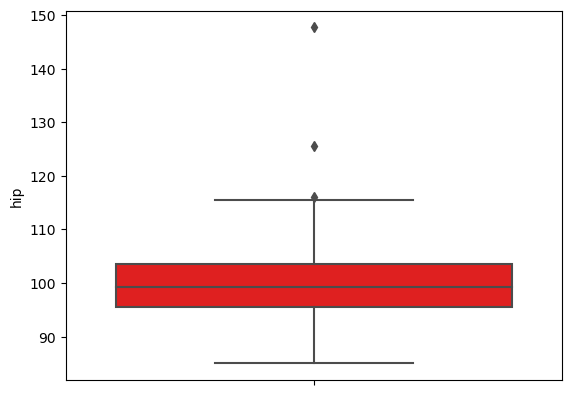

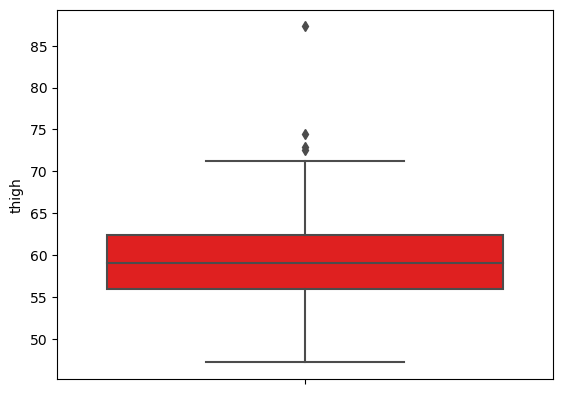

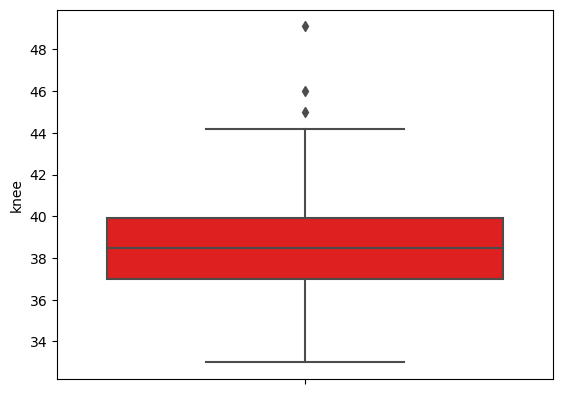

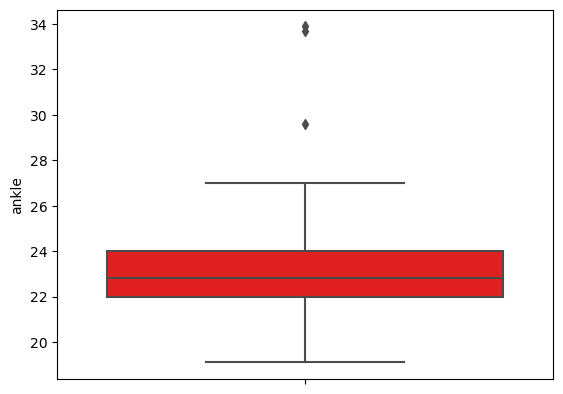

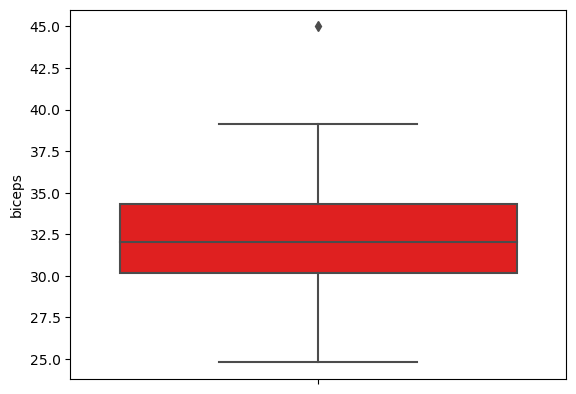

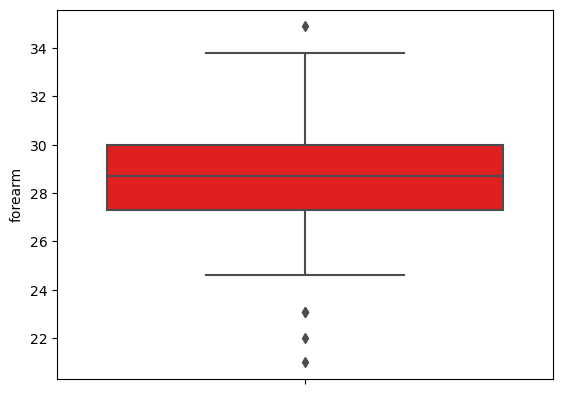

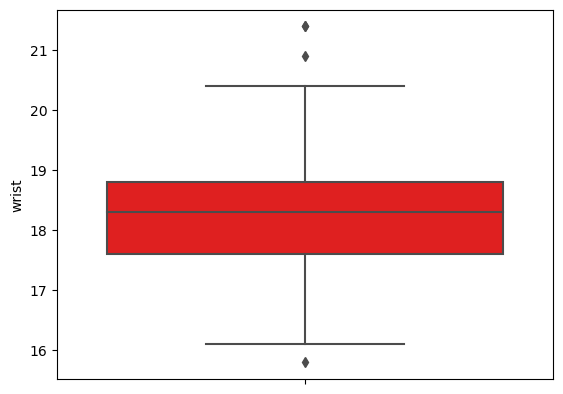

In [72]:
for i in df.columns:
    if df[i].dtype!="object":
            sns.boxplot(y=df[i],color="red")
            plt.show();

In [118]:
def outlier(col):
    Q3, Q1= np.nanpercentile(col,[75,25])
    iqr=Q3-Q1
    ul=Q3+1.5*iqr
    ll=Q1-1.5*iqr
    return ul, ll

In [119]:
for column in df.columns:
    if df[column].dtype !="object":
        ul,ll=outlier(df[column])
        df[column]=np.where((df[column]>ul)|(df[column]<ll),np.nan,df[column])

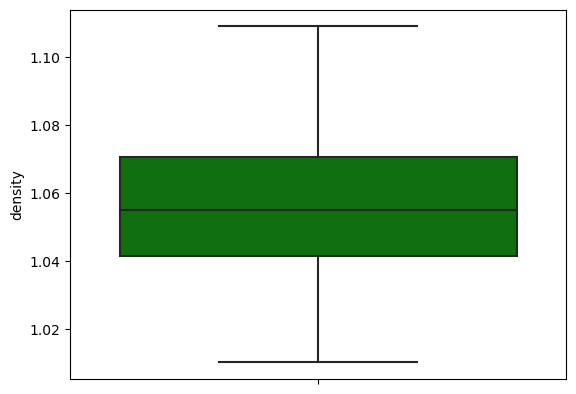

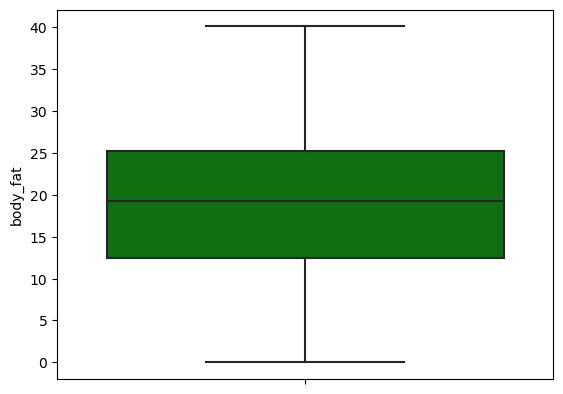

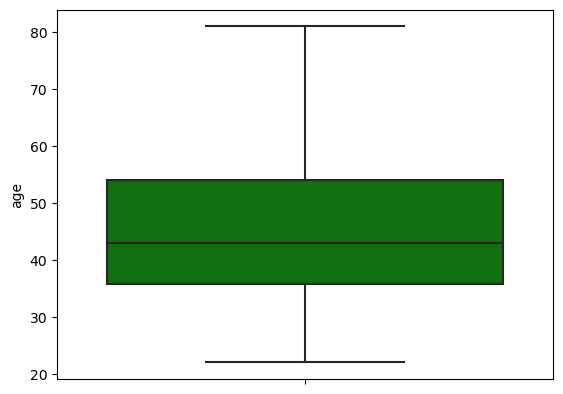

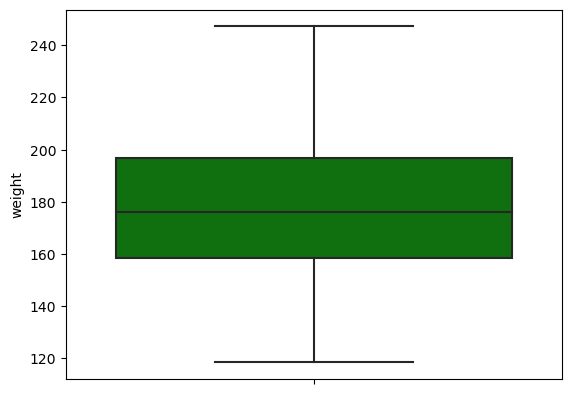

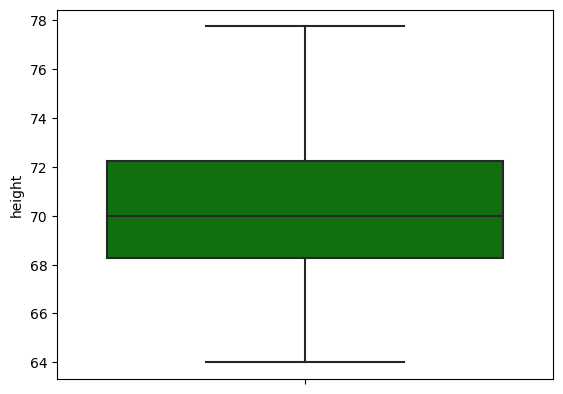

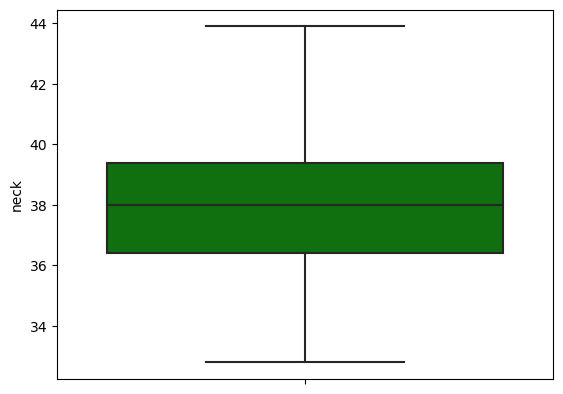

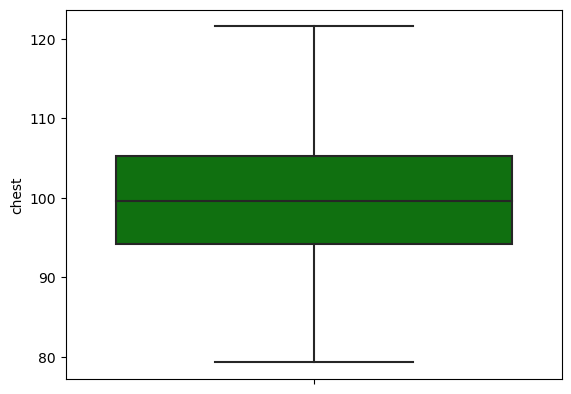

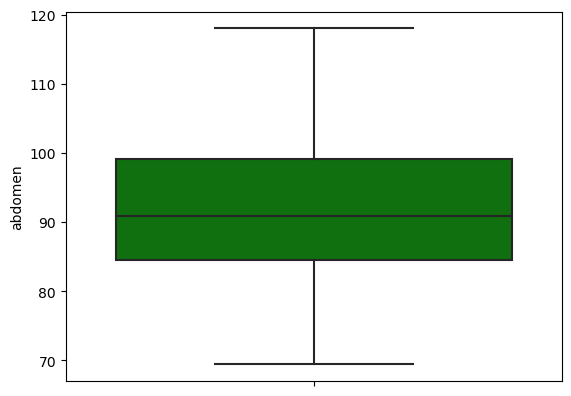

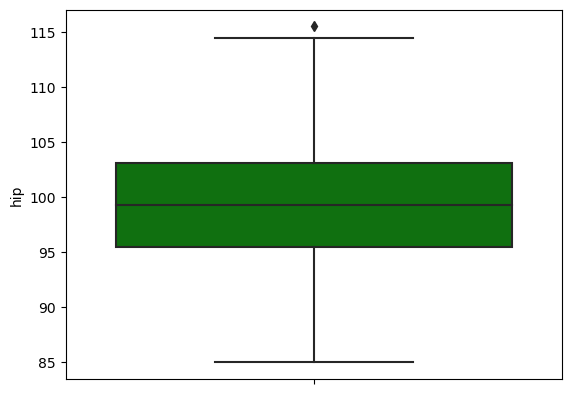

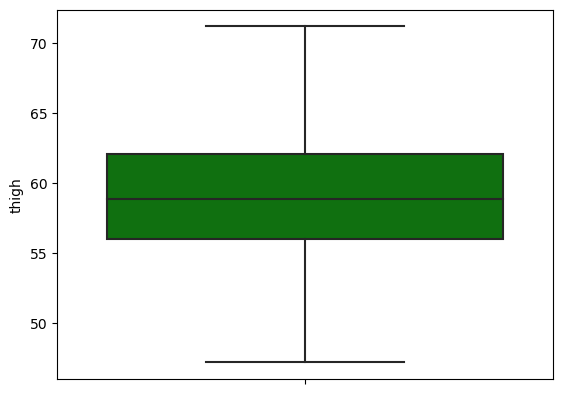

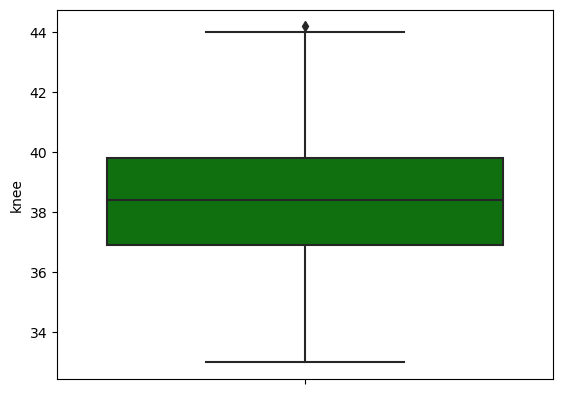

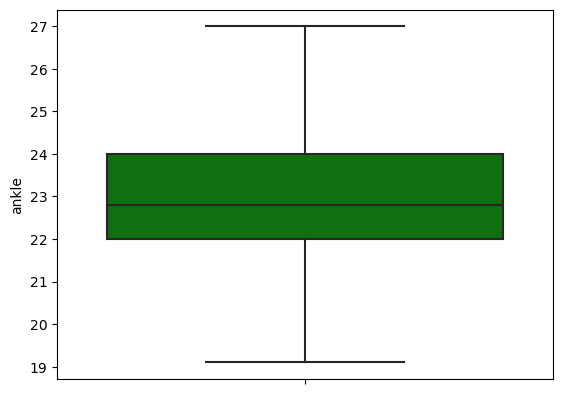

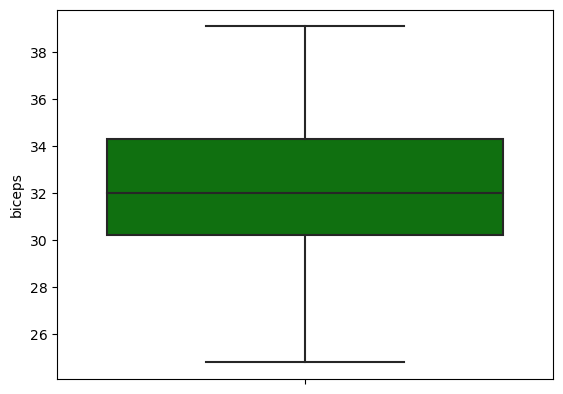

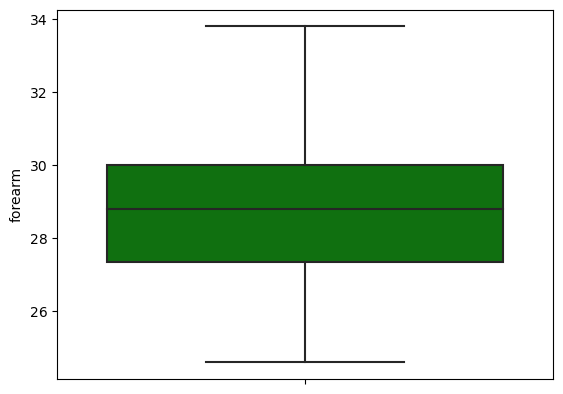

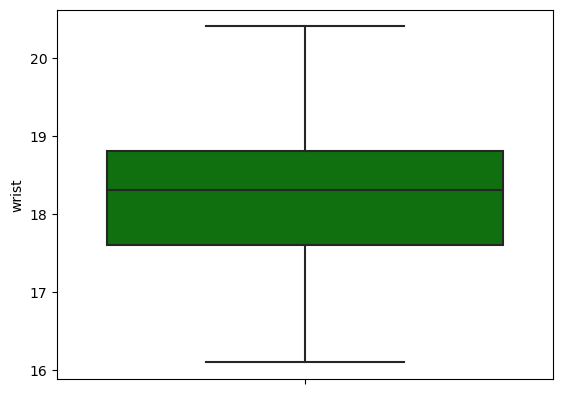

In [120]:
 for i in df.columns:
    if df[i].dtype !="object":
        sns.boxplot(y=df[i],color="green")
        plt.show()

In [121]:
df.isnull().sum()

density     1
body_fat    1
age         0
weight      2
height      1
neck        3
chest       2
abdomen     3
hip         3
thigh       4
knee        3
ankle       3
biceps      1
forearm     5
wrist       4
dtype: int64

In [122]:
df.dropna(inplace=True)

In [123]:
df.shape

(234, 15)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   density   252 non-null    float64
 1   body_fat  252 non-null    float64
 2   age       252 non-null    int64  
 3   weight    252 non-null    float64
 4   height    252 non-null    float64
 5   neck      252 non-null    float64
 6   chest     252 non-null    float64
 7   abdomen   252 non-null    float64
 8   hip       252 non-null    float64
 9   thigh     252 non-null    float64
 10  knee      252 non-null    float64
 11  ankle     252 non-null    float64
 12  biceps    252 non-null    float64
 13  forearm   252 non-null    float64
 14  wrist     252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


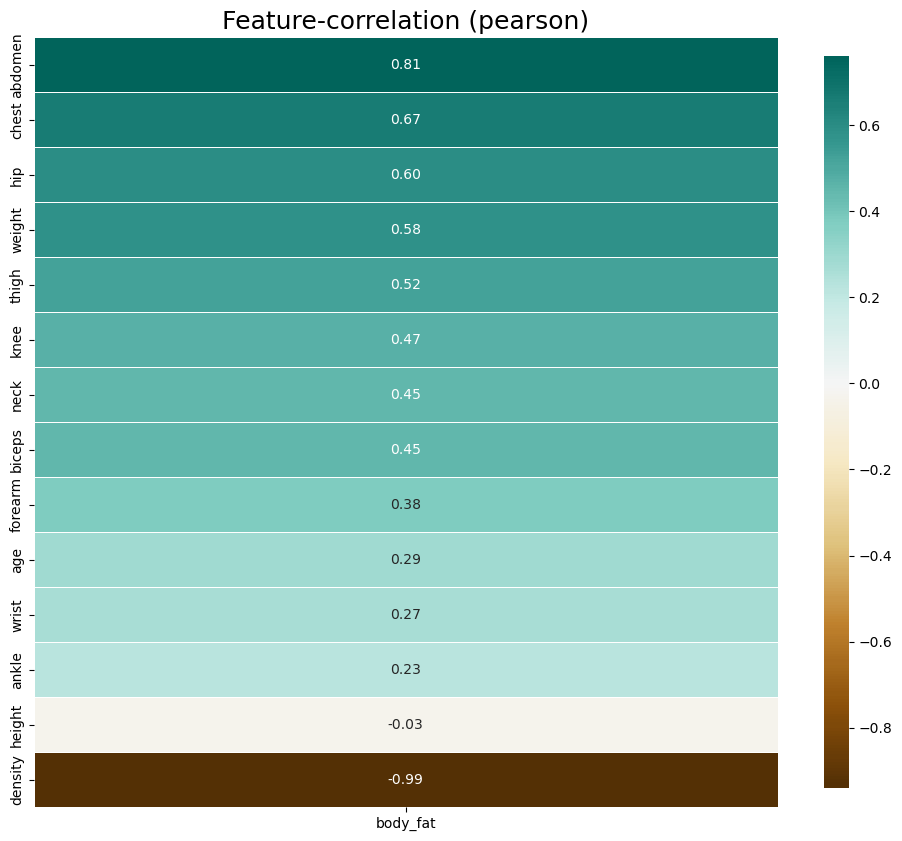

In [125]:
k.corr_plot(data=df,target="body_fat");

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   density   252 non-null    float64
 1   body_fat  252 non-null    float64
 2   age       252 non-null    int64  
 3   weight    252 non-null    float64
 4   height    252 non-null    float64
 5   neck      252 non-null    float64
 6   chest     252 non-null    float64
 7   abdomen   252 non-null    float64
 8   hip       252 non-null    float64
 9   thigh     252 non-null    float64
 10  knee      252 non-null    float64
 11  ankle     252 non-null    float64
 12  biceps    252 non-null    float64
 13  forearm   252 non-null    float64
 14  wrist     252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [141]:
x=df[["knee","thigh","weight",'hip',"chest","abdomen"]].values

In [142]:
y=df[["body_fat"]].values

In [143]:
sc=RobustScaler()

In [144]:
x=sc.fit_transform(x)

In [145]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [146]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  4.480271412699883
****************************************************************************************************
cross validation model : Lasso
AVERAGE RMSE:  4.964919756866431
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  4.484918035733663
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  6.839323073644657
****************************************************************************************************
cross validation model : RandomForestRegressor
AVERAGE RMSE:  4.9032278802166305
****************************************************************************************************


In [147]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [148]:
model=LinearRegression()

In [149]:
model.fit(x_train,y_train)

LinearRegression()

In [150]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
}

In [151]:
print("model trained with {}".format(model))
training_score = model.score(x_train, y_train)*100
testing_score = model.score(x_test, y_test)*100
score = r2_score(y_test, model.predict(x_test))*100
mae = mean_absolute_error(y_test, model.predict(x_test))
mse = mean_squared_error(y_test, model.predict(x_test))
rmse = np.sqrt(mse)
print("r2score: ",score)
print("training_score: ", training_score)
print("testing_score: ", testing_score)
print("mae: ", mae)
print("mse: ", mse)
print("rmse_test: ", rmse)

model trained with LinearRegression()
r2score:  60.19426995732601
training_score:  71.70826834404372
testing_score:  60.19426995732601
mae:  3.7126931522667515
mse:  21.274200351991393
rmse_test:  4.612396378455715


In [152]:
y_pred=model.predict(x)


In [153]:
op=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)
op

,ACTUAL,PREDICTED
0,12.3,16.290188
1,6.1,11.001061
2,25.3,18.685123
3,10.4,12.774924
4,28.7,26.369969
...,...,...
229,30.2,28.219575
230,11.0,15.523359
231,33.6,27.523771
232,29.3,36.844725


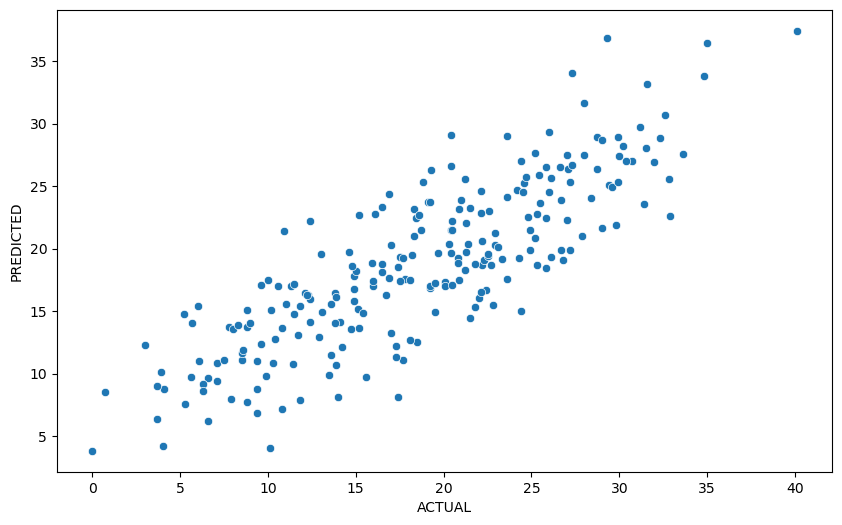

In [154]:
plt.figure(figsize=(10,6))
plt.xticks()
sns.scatterplot(data=op,x='ACTUAL',y="PREDICTED")
plt.show();

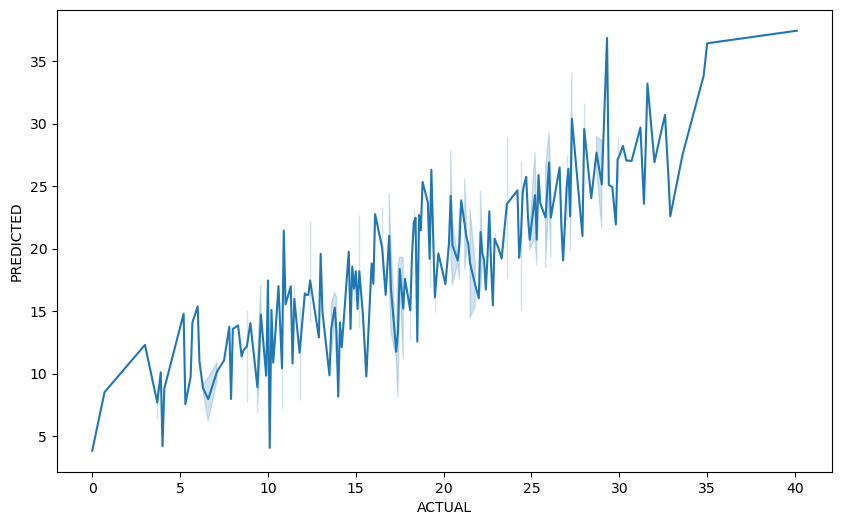

In [155]:
plt.figure(figsize=(10,6))
plt.xticks()
sns.lineplot(data=op,x='ACTUAL',y="PREDICTED")
plt.show();